In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from PIL import Image

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))


In [2]:
img = Image.open("C://Users//Administrator//.vscode//Module 10//dogs.jpeg")
np_array = np.array(img)

print("Array shape")
print(np_array.shape)

print("\nDimensions of the Image")
print("Height : " + str(img.height))
print("Width : " + str(img.width))

Array shape
(185, 272, 3)

Dimensions of the Image
Height : 185
Width : 272


In [3]:
flat_array = np_array.ravel()
new_array = flat_array.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])


In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

print("\nCluster centroids")
print(kmeans.cluster_centers_)


Cluster centroids
[[ 29.51227648  21.5747799   20.43489911]
 [251.46832772 247.54111619 242.90525946]
 [210.39963714 174.64473033 143.52836879]]


In [5]:
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())

Elements of Each cluster 
{0: 18290, 1: 19837, 2: 12193}
   col1  col2  col3  cluster
0   240   240   240        1
1   255   255   255        1
2   255   255   255        1
3   251   251   251        1
4   255   255   255        1


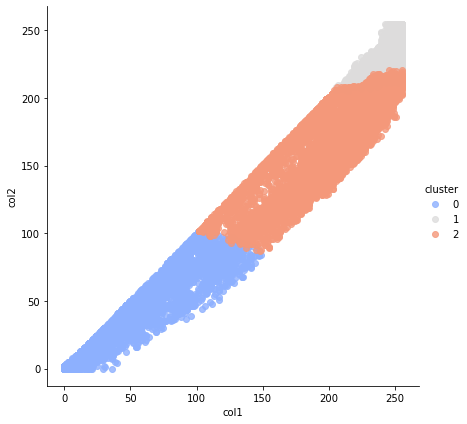

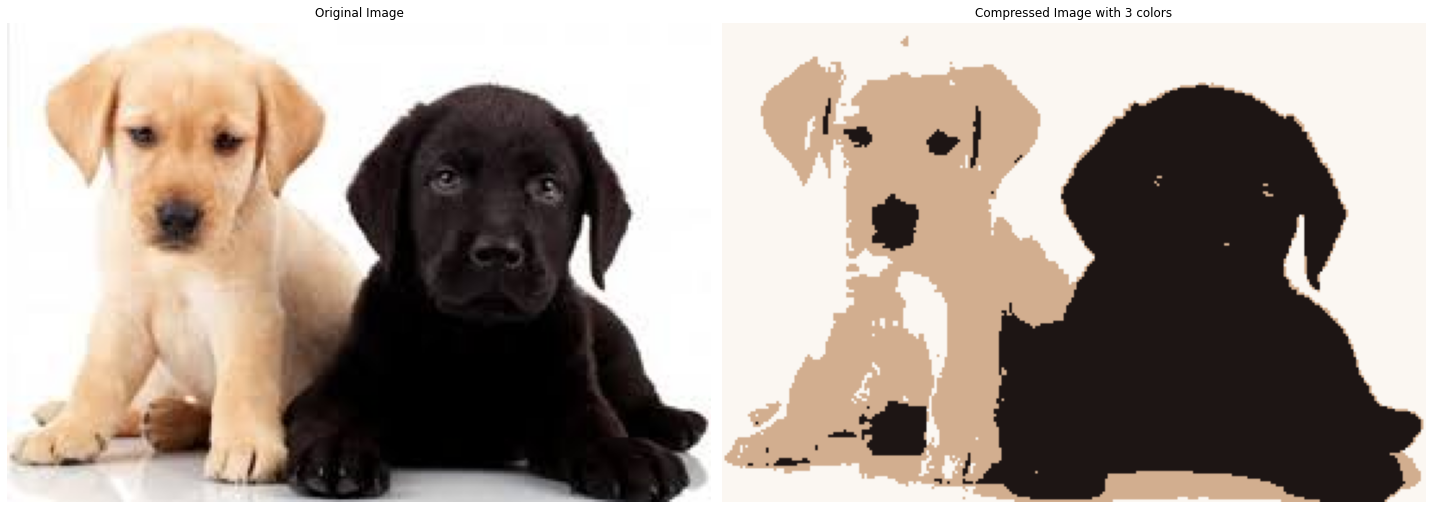

In [6]:
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False)


X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    np_array.shape[0], np_array.shape[1], np_array.shape[2])


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

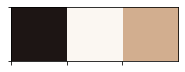

In [7]:
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()